# ShapeNet Dataloader

In [1]:
%matplotlib inline
import cv2
import numpy as np
from tqdm import tqdm, tqdm_notebook
import torch
from torch.autograd import Variable
import quat_math as qm
import pickle
import pylab

from PIL import Image
import scipy.io as scio
from functools import partial
from object_pose_utils.utils import to_np

import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = 20, 12
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

## Image viewing functions

In [2]:
def imshowCV(img, axis = False):
    if not axis:
        plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
def imshow(img, axis = False, colorbar = False):
    if not axis:
        plt.axis('off')
    plt.imshow(img)
    if(colorbar):
        plt.colorbar()
    plt.show()
    
def torch2Img(img):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    disp_img = to_np(img)
    if len(disp_img.shape) == 4:
        disp_img = disp_img[0]
    disp_img = disp_img.transpose((1,2,0))
    #disp_img = disp_img * std + mean
    return disp_img
    
#from generic_pose.utils.image_preprocessing import unprocessImages
def imshowTorch(img, axis = False):
    if not axis:
        plt.axis('off')
    disp_img = torch2Img(img)
    plt.imshow(disp_img.astype(np.uint8))
    #plt.imshow(unprocessImages(img)[0])
    plt.show()

def plotImageScatter(img, choose):
    coords = np.unravel_index(choose, img.shape[:2])    
    plt.axis('off')
    plt.imshow(img.astype(np.uint8))    
    plt.scatter(coords[1], coords[0], 50)
    #plt.colorbar()
    plt.show()

## Calling the dataloader

In [3]:
dataset_root = '/ssd0/datasets/shapenet'

In [6]:
from object_pose_utils.datasets.pose_dataset import OutputTypes as otypes
from object_pose_utils.datasets.image_processing import ColorJitter, ImageNormalizer
from object_pose_utils.datasets.point_processing import PointShifter
from object_pose_utils.datasets.inplane_rotation_augmentation import InplaneRotator

output_format = [otypes.DEPTH_POINTS_MASKED_AND_INDEXES,
                 otypes.IMAGE_CROPPED,
                 otypes.MODEL_POINTS_TRANSFORMED,
                 otypes.MODEL_POINTS,
                 otypes.OBJECT_LABEL,
                 ]

from object_pose_utils.datasets.shapenet_dataset import ShapeNetDataset as ShapeNetDataset
#from object_pose_utils.datasets.ycb_dataset import YcbImagePreprocessor

object_list = [['03797390', '6661c0b9b9b8450c4ee002d643e7b29e']]

# with open('{0}/image_sets/classes.txt'.format(dataset_root)) as f:                                    
#     classes = f.read().split()
# classes.insert(0, '__background__')
dataset = ShapeNetDataset(dataset_root, mode='train', 
                     object_list = object_list, 
                     output_data = output_format, 
                        add_syn_background = False,
                     image_size = [640, 480], num_points=1000,
                     preprocessors = [ColorJitter(), InplaneRotator()],
                    postprocessors = [ImageNormalizer(), PointShifter()])

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=0)

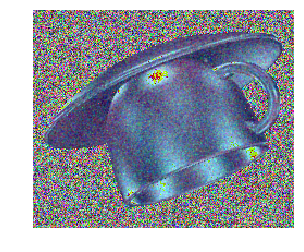

In [7]:
# Demo of dataloader
for data in dataloader:
    points, choose, img, target, model_points, idx = data
    break

imshowTorch(img[0])
#print('{} at rotation {}, and translation {}'.format(classes[int(obj)], np.round(to_np(q)[0], 2), np.round(to_np(t)[0], 2)))
